In [2]:
import sympy as sp
sp.init_printing(order='grlex')

k, A0, t = sp.symbols('k, A0, t')

A = sp.Function('A')

In [3]:
eq = sp.Eq(A(t).diff(t,1), k*A(t))
eq

In [4]:
sol = sp.dsolve(eq, ics={A(0):A0})
sol

In [30]:
# Descobrindo o valor de k
sol2 = sol.subs({A(t):0.00043*A0, t:15})
sol2
vk = sp.Eq(0.00043, sp.E**(15*k))
vk = sp.solve(vk)
vk = vk[0] if type(vk) is list else vk
vk

[-0.00043 + exp(-15), -0.000429644592209111, -0.000429587075058413, -0.000429520249663187, -0.000429442609630731, -0.000429352404782416, -0.000429247601700784, -0.000429125837891800, -0.000428984368528998, -0.000428820004578997, -0.000428629040913616, -0.000428407172788059, -0.000428149398802418, -0.000427849908159015, -0.000427501949674133, -0.000427097679591350, -0.000426627984765861, -0.000426082277233976, -0.000425448255536917, -0.000424711627418641, -0.000423855787646672, -0.000422861443693309, -0.000421706180839243, -0.000420363956896036, -0.000418804515157409, -0.000416992702345932, -0.000414887676180145, -0.000412441984698894, -0.000409600496588828, -0.000406299158402248, -0.000402463550650253, -0.000398007210222311, -0.000392829681315873, -0.000386814250939658, -0.000379825317943824, -0.000371705336269131, -0.000362271263509146, -0.000351310434728205, -0.000338575768521826, -0.000323780197253541, -0.000306590195913320, -0.000286618263723706, -0.000263414189012366, -0.000236454

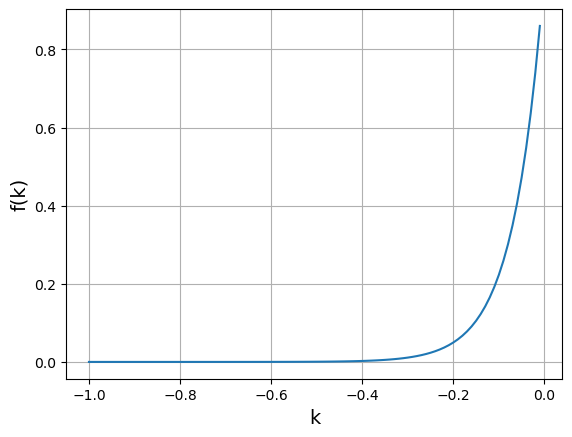

In [28]:
#Descobrindo k por método numérico:

import numpy as np
import matplotlib.pyplot as plt
import sys as sys

def f(ks):
    funcao = -0.00043 + pow(sp.E,(15*ks))
    return funcao

def bissec(a, b, erro, zero):

    while (b-a) > erro:
        E = (b+a)/2
        if (f(a) < zero and f(b) > zero and f(E) > zero) or (f(a) > zero and f(b) < zero and f(E) < zero):
            b = E
        elif (f(a) < zero and f(b) > zero and f(E) < zero) or (f(a) > zero and f(b) < zero and f(E) > zero):
            a = E
        else:
            break
    
    return E

# Gráfico para f(k):
start = int(input('Qual o k de início? '))
end = int(input('Qual o k final?' ))
pres = int(input('Qual a precisão? '))

X = list()

max = abs(start-end)*pres
x = start
for i in range(1, max+1):
    X.append(x)
    x += 1/pres

Y = [f(i) for i in X]
print(Y)


plt.xlabel("k", fontsize=14)
plt.ylabel("f(k)", fontsize=14)

plt.plot(X,Y)
plt.grid()
plt.show()


In [29]:
valork = bissec(-1, 0, 0.000001, 0)
print(valork)

-0.5167818069458008


In [37]:
#sabendo k, qual o valor de t para a meia vida?

eq3 = sol.subs({A(t):0.5*A0, A0:1, k:-0.517}) #ou o vk
eq3  #Por algum motivo, não resolve analíticamente

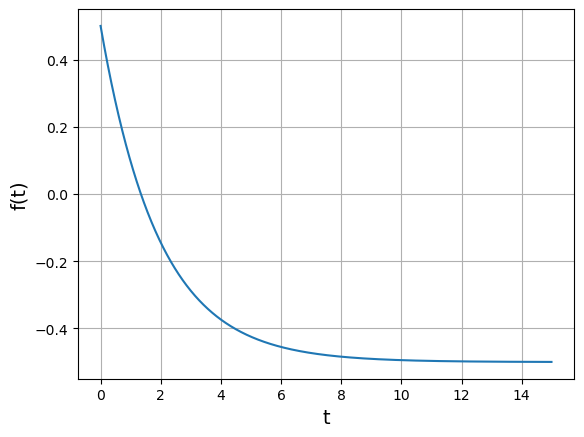

In [39]:
#Vamos usar o método numérico de novo agora com o método das secantes

def f(t):
    return -0.5 + sp.E**(-0.517*t)

def phisf(x0, x): # função phi(x) do MNR com a derivada calculada numericamente
    df = (f(x) - f(x0))/(x-x0)
    return x - f(x)/df

def secantes(a, b, erro):
    x0 = a
    x = b
    k = 0

    if abs(f(x0)) < erro:
        k += 1
        print(f'Iteração {k} ; x = {x0} ; f(x) = {f(x0)}')
    else:
        k += 1
        while True:
            x = phisf(x0, x)
            print(f'Iteração {k} ; x = {x} ; f(x) = {f(x)}')

            if abs(f(x)) < erro or abs(x-x0) < erro:
                break

            m = (x + x0)/2

            if (f(x0) < 0 and f(x) > 0 and f(m) > 0) or (f(x0) > 0 and f(x) < 0 and f(m) < 0):
                x = m
            elif (f(x0) < 0 and f(x) > 0 and f(m) < 0) or (f(x0) > 0 and f(x) < 0 and f(m) > 0):
                x0 = m

            k += 1
    
    return x

start = int(input('Qual o x de início? '))
end = int(input('Qual o x final?' ))
pres = int(input('Qual a precisão? '))

X = list()

max = abs(start-end)*pres
x = start
for i in range(1, max+1):
    X.append(x)
    x += 1/pres

Y = [f(i) for i in X]

plt.xlabel("t", fontsize=14)
plt.ylabel("f(t)", fontsize=14)

plt.plot(X,Y)
plt.grid()
plt.show()

In [40]:
#então...
tmeiavida = secantes(0,2,0.0001)
print(tmeiavida)

Iteração 1 ; x = 1.55178729695948 ; f(x) = -0.0516916636527786
Iteração 2 ; x = 1.37051164728369 ; f(x) = -0.00764462762342588
Iteração 3 ; x = 1.34272844952853 ; f(x) = -0.000521441832379566
Iteração 4 ; x = 1.34077868813827 ; f(x) = -0.0000177002904621082
1.34077868813827
